In [0]:
from fastai.vision import *

In [0]:

folder = 'messi'
file = 'messi.txt'

In [0]:
path = Path('data/footballers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:

path.ls()

[PosixPath('data/footballers/models'),
 PosixPath('data/footballers/ronaldo'),
 PosixPath('data/footballers/ronaldo.txt'),
 PosixPath('data/footballers/messi'),
 PosixPath('data/footballers/neymar'),
 PosixPath('data/footballers/cleaned.csv'),
 PosixPath('data/footballers/messi.txt'),
 PosixPath('data/footballers/neymar.txt')]

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'ronaldo'
file = 'ronaldo.txt'

In [0]:
path = Path('data/footballers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/hascqrsmlsnkxbjj0dk5 HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/hascqrsmlsnkxbjj0dk5 (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


In [0]:
folder = 'neymar'
file = 'neymar.txt'

In [0]:
path = Path('data/footballers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['messi','neymar','ronaldo']

In [0]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

messi


cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000165.jpg'>
Image data/footballers/messi/00000122.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000065.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/messi/00000155.jpg'>
neymar


cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000022.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000035.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000093.jpg'>
Image data/footballers/neymar/00000142.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000118.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='data/footballers/neymar/00000062.jpg'>
ronaldo


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['messi', 'neymar', 'ronaldo']

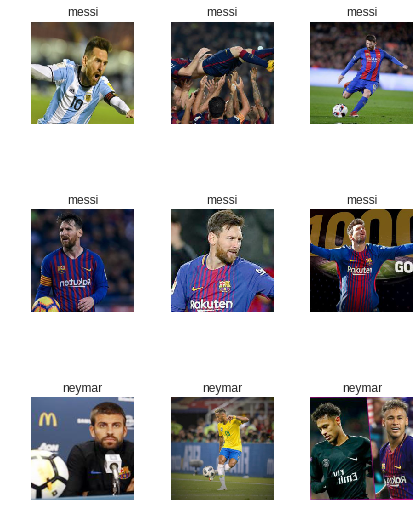

In [0]:
data.show_batch(rows=3, figsize=(6,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['messi', 'neymar', 'ronaldo'], 3, 387, 96)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate
1,1.414273,1.168317,0.645833
2,1.169214,0.737015,0.364583
3,0.958766,0.639312,0.260417
4,0.822171,0.591534,0.229167
5,0.734161,0.567272,0.239583
6,0.663308,0.555181,0.218750


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


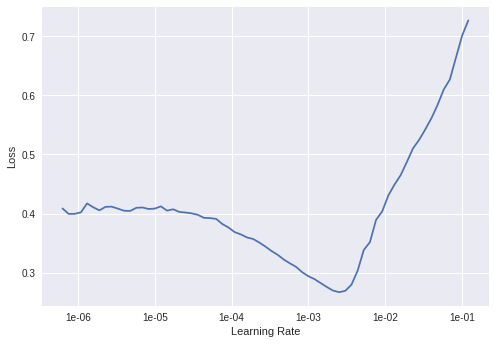

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.515017,0.911957,0.250000
2,0.386507,0.469440,0.166667


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

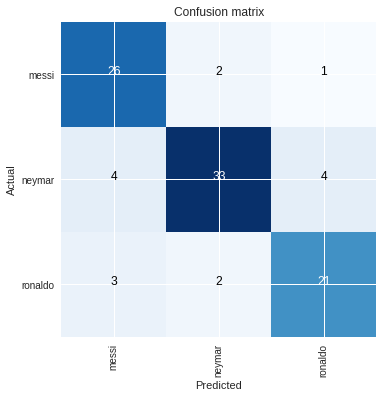

In [0]:
interp.plot_confusion_matrix()

In [0]:

from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
  ImageCleaner(ds, idxs, path)